# Исследование интернет-магазина «Стримчик»

## Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Данные представлены до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Описание данных**
   -  Name — название игры
   -  Platform — платформа
   -  Year_of_Release — год выпуска
   -  Genre — жанр игры
   -  NA_sales — продажи в Северной Америке (миллионы проданных копий)
   -  EU_sales — продажи в Европе (миллионы проданных копий)
   -  JP_sales — продажи в Японии (миллионы проданных копий)
   -  Other_sales — продажи в других странах (миллионы проданных копий)
   -  Critic_Score — оценка критиков (максимум 100)
   -  User_Score — оценка пользователей (максимум 10)
   -  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
   
  


## Шаг 1. Откроем файл с данными и изучим общую информацию

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />стоит делить блок загрузки библиотек и код загрузки датасета, в случае необходимости добавления новых библиотек не придется загружать весь датасет заново и перезапускать проект целиком

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/games.csv')
data.head(10)
#откроем датафрейм и выведем на экран первые 10 строк


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Теперь посмотрим общую информацию о ней для дальнейшего анализа
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нескольких столбцах есть пропуски и неверные типы данных.  В следующем шаге разберем их более детально.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> обзор данных проведен корректно

## Шаг 2. Подготовим данные

Прежде посмотрим по этой выборке наличие дубликатов.

In [3]:
data_d=data[data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]
data_d[['Name', 'Platform', 'Year_of_Release']]

,Name,Platform,Year_of_Release
14244,NaN,GEN,1993.0
16230,Madden NFL 13,PS3,2012.0


Обнаружено два дубликата. Удалим их.

In [4]:
data=data.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'])

Далее заменим названия столбцов и сами столбцы (приведем к нижнему регистру).

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

Выведем количество пропущенных значений

In [7]:
data.isna().sum().sort_values(ascending = False) 

critic_score       8577
rating             6765
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

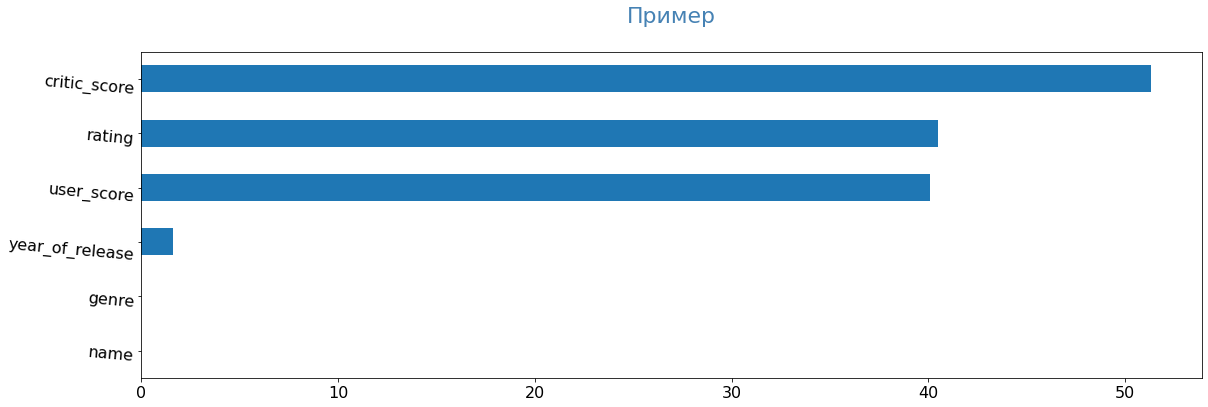

In [9]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
мой график оформлен не совсем корректно, сможешь отметить, что стоило бы исправить в графике?
  

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
За поворот текста отвечает параметр rot, можно добавить обозначение оси х (процент записей с пропусками)
        
        df.isna().mean()*100 — для расчета процента пропусков в колонке
        
На графике мы оцениваем масштаб проблемы с пропусками и возможное совпадение % пропущенных значений в колонках

Удалим 2 строки в столбце name и  genre, в которых нет названий игр и информации о жанре. Пропусков всего два и удаление не скажется на результат исследования. Пропуск скорее всего возник из-за технической ошибки.

In [10]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset =['genre'] )

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...

В столбцах critic_score, user_score встречается весьма большое количество пропусков: больше трети всего датафрейма. Удалять такое количество данных нельзя, но в дальнейшем по этим данным необходимо будет строить гипотезы и исследовать их, поэтому заполнять их медианой или средним арифметическим недопустимо. Оставим эти пропуски, заполнив строки значением 3000. Тоже самое проделаю и со столбцом year_of_release, где в 269 записях нет года выпуска. Думаю это тоже связано с технической ошибкой. А в столбце rating заполним пропуски NaN. Пропуски в столбцах рейтингов критиков и пользователей, вероятно, связаны с тем, что не каждая игра удостаивалась внимания критиков или не доходила до широких международных рынков, а также с региональными особенностями.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />плюс  отсутствие ресурсов на сбор информации (время, деньги)

In [11]:
data['critic_score'] = data['critic_score'].fillna('3000')
data['user_score'] = data['user_score'].fillna('3000')
data['rating'] = data['rating'].fillna('NaN')
data['year_of_release'] = data['year_of_release'].fillna('3000')
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,3000,3000,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,3000,3000,NaN


В столбце user_score встречается абвериатура tbd. Он означает, что рейтинг будет определён позднее. Заменю также на 3000.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличное решение для столбца, который содержит категориальные данные, поможет определить ключевое различие в потрете пользователя
        
        data['rating'] = data['rating'].fillna('NaN')
        
Можно посмотреть на частотность использования категорий рейтинга, по отношению к остальным
        
        EC         8
        K-A        3
        RP         1
        AO         1

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Не стоит заполнять пропуски в колонке с числовыми данными — строковыми данными
        
        data['critic_score'] = data['critic_score'].fillna('NaN')
        data['user_score'] = data['user_score'].fillna('NaN')

        data['year_of_release'] = data['year_of_release'].fillna('NaN')

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> От этой замены суть не поменялась, апострофы означают, что мы заполняем пропуски строковыми данными
        
        data['critic_score'] = data['critic_score'].fillna('3000')

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '3000'
data['user_score'].unique()

array(['8', '3000', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3',
       '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8',
       '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3',
       '4.3', '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Замена успешно прошла. Проверим остались ли пропуски.

In [13]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропусков нет. Теперь преобразуем данные в нужные типы. 

In [14]:
data.dtypes 

name                object
platform            object
year_of_release     object
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score        object
user_score          object
rating              object
dtype: object

Нужно исправить типы данных с годом релиза, оценками от критиков и игроков  на float.

In [15]:
data ['critic_score'] = data ['critic_score'].astype('float')
data ['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('float') 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,3000.0,3000.0,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,3000.0,3000.0,NaN


Проверим теперь таблицу на наличие дубликатов.

In [16]:
data.duplicated().sum()

0

Дубликатов не обнаружено. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Проверка на поиск дубликатов выполнена, молодец
        
Особенно это станет важным, когда мы перейдем к более сложным задачам на втором модуле курса
          

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
На рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров: 
   
    ['name', 'platform', 'year_of_release']
    
С обязательным приведением содержимого категориальных колонок к нижнему регистру
        
В сырой выборке имеется 2 строчки неполных дубликатов
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Поиск вела по "сырой" таблице, поэтому данный шаг перенесла в самое начало предобработки.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. 

In [17]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,3000.0,3000.0,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,3000.0,3000.0,NaN,31.38


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Столбец успешно добавлен.

В ходе работы мы подготовили данные для дальнейшего изучения.  В столбцах name и  genre удалили пропуски. В critic_score, user_score, year_of_release и rating пропуски заменили на NaN. Изменили тип данных  в столбцах с оценками от критиков и игроков на float. Затем был добавлен дополнительный столбец с суммарными продажами во всех регионах.

In [18]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  sales            16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


## Шаг 3. Проведем исследовательский анализ данных

Изучим количество игр, которые выпускались в разные годы.

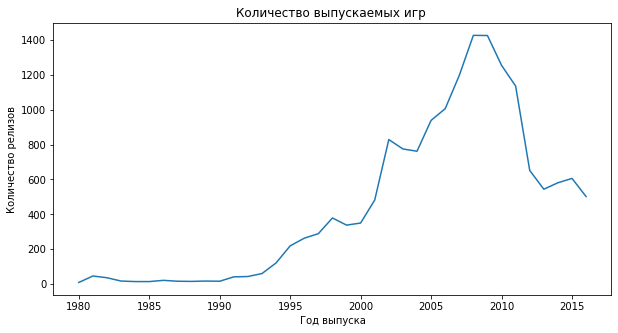

In [19]:
data5=data.query('year_of_release!=3000')
data5.groupby('year_of_release')['year_of_release'].count().plot( figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Количество выпускаемых игр ')
plt.show()

Количество выпускаемых игр с годами значительно возросло. Больше всего игр было выпущено с 2006 по 2011 год.

Изучим изменение продаж в зависимости от платформы. Для начала посмотрим, какие суммарные продажи у разных платформ.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Классный график, все элементы добавлены, молодец

In [20]:
data.groupby('platform')['sales'].sum().sort_values(ascending=False) .head()

platform
ps2     1255.77
x360     971.42
ps3      939.64
wii      907.51
ds       806.12
Name: sales, dtype: float64

Больше всего продаж у платформ  PS2,  X360 , PS3, Wii  и DS. Построим распределение по годам для первых Топ-5 платформ.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. ⬇⬇⬇
    
</div>

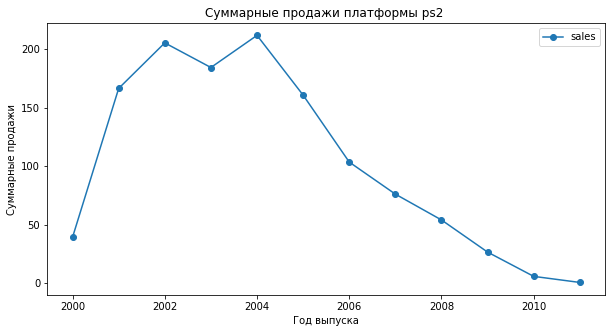

In [21]:
data5[data5['platform'] == 'ps2'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-', figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы ps2 ')
plt.show()

Продажи на платформе PS2 стремительно рос до 2004 года, после шел к спаду.

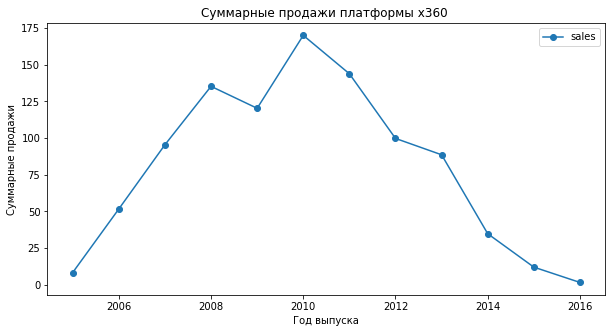

In [22]:
data5[data5['platform'] == 'x360'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-', figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы x360 ')
plt.show()

Здесь тоже видим стремительный рост. Верхушкой айсберга был 2010 год, затем продажи начали падать.

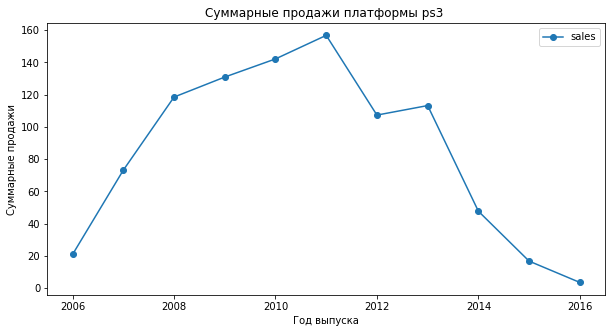

In [23]:
data5[data5['platform'] == 'ps3'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-', figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы ps3 ')
plt.show()

На данной платформе пик продаж приходился на 2011 год. После этого года тоже продажи пошли на спад.

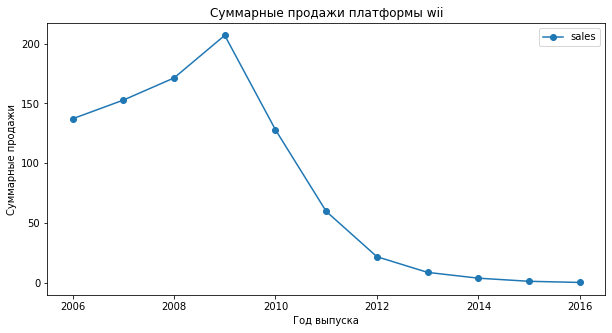

In [24]:
data5[data5['platform'] == 'wii'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-', figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы wii')
plt.show()

Этот график показывает примерно ту же картину. После пика в 2009 году пошел спад.

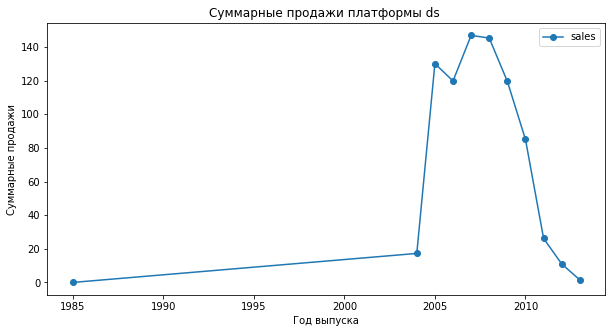

In [25]:
data5[data5['platform'] == 'ds'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-', figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы ds ')
plt.show()

И на данном графике начинается рост с 2005 года и спад с 2009. Здесь неверно указан год релиза. На самом деле он был в 2004 году.

По данным графикам можно сделать вывод что компьютерные игры продаются в среднем 10 лет. Пик продаж приходится на 5 год. После чего продажи падают.

Построим прогноз на 2017 год. Для этого возьмем данные с 2014 года.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Отличное определение жизненного цикла продаж у платформ, молодец
        
        По данным графикам можно сделать вывод что компьютерные игры продаются в среднем 10 лет.

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Странный выброс 1985 года у DS, можно посмотреть когда платформу выпустили на рынок, стоит удалить аномалию 

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Нет кода, который удаляет именно эту аномалию

        
        Странный выброс 1985 года у DS, можно посмотреть когда платформу выпустили на рынок, стоит удалить аномалию 

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заработалась видимо:) исправила

В платформе ds у одной игры указан год продаж 1985, но на самом деле игра была выпушенна в 2004 году. Удалим аномалию. 

In [26]:
#дополнительно проверим от какого количества значений мы избавились
len(data.query('year_of_release ==1985 & platform == "ds"'))/len(data)*100

0.005983724269985639

In [27]:
data1=data.query('year_of_release ==1985 and  platform == "ds"').index

In [28]:
data3=data.drop(index=data1)

In [29]:
df=data3.query('year_of_release >= 2014')  #создадим срез начиная с 2014 года

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
        
        df=data.query('year_of_release >= 2010')  #создадим срез начиная с 2010 года

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

Определим какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.

In [30]:
df.groupby('platform')['sales'].sum().sort_values(ascending=False).head() #топ 5 платформ

platform
ps4     288.15
xone    140.36
3ds      87.87
ps3      76.49
x360     58.40
Name: sales, dtype: float64

Для наглядности построим для каждой платформы график.

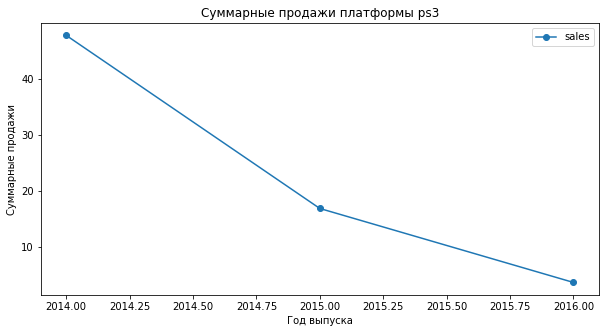

In [31]:
data6=df.query('year_of_release!=3000')
data6[data6['platform'] == 'ps3'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-',  figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы ps3')
plt.show()

Как видно по графике продажи на данной платформе,начиная с 2014 года, пошли на спад

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Можно подправить подписи оси х, в виде целых 2014, 2015 ..., 
        
искать тему Ticks and ticklabels
        
https://matplotlib.org/stable/tutorials/text/text_intro.html
        
или
        
https://dev-gang.ru/article/izmenenie-czastoty-tikov-v-matplotlib-k5x1kznn39/?ysclid=lcp5si8pky848462627

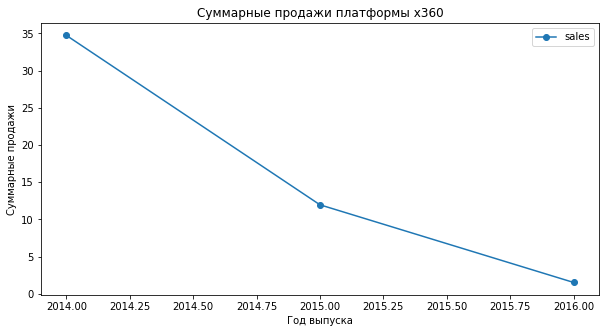

In [32]:
data6[data6['platform'] == 'x360'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-',  figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы x360')
plt.show()

Продажи на платформе X360 стремительно пошли вниз.

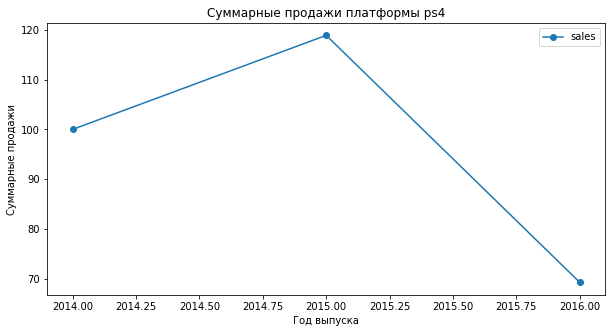

In [33]:
data6[data6['platform'] == 'ps4'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-',  figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы ps4')
plt.show()

Продажи PS4 растут: к 2016 году видно некоторое снижение, но за 2016 год данные не полные, поэтому эту платформу всё же можно назвать перспективной.

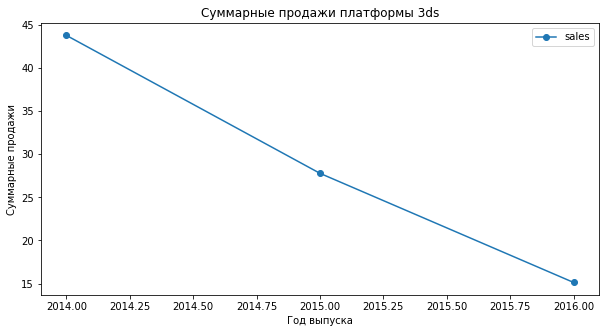

In [34]:
data6[data6['platform'] == '3ds'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-',  figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы 3ds')
plt.show()

Здесь тоже продажи идут на спад.

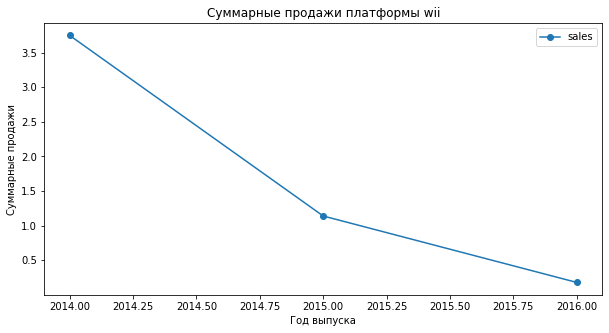

In [35]:
data6[data6['platform'] == 'wii'].pivot_table(index=['year_of_release'], values='sales', aggfunc='sum').plot(style='o-',  figsize = (10, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи платформы wii')
plt.show()

Суммарные продажи платформы Wii после 2014 года неуклонно снижаются

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

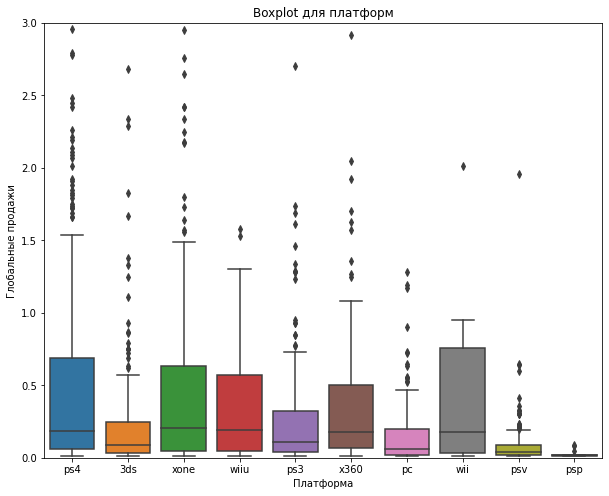

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x ='platform', y = 'sales', data=data6);
plt.ylim(0,3)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('Boxplot для платформ')
plt.show()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, ты используешь диаграмму размаха для определения успешности платформы, молодец
        
Для более полной оценки продаж на платформах стоит добавить график со 100% масштабом, посмотреть на максимальные продажи 

Сравнивая глобальные продажи разных платформ за актуальный период на диаграмме размаха, первое что посмотрим это минимальные и максимальные значения. Есть выбросы свыше 3млн., видммо была какая-то очень популярная игра. Но объетивнее рассматривать межквартальный размах. Наилучшие показатели у ps4 - на уровне 1,55 млн., дальше идет хоne фактически лидер последних (до 2016 года) лет -1,5 млн., далее идет wiiu - 1,4 млн, х360 - 1,2 млн. и wii - 1млн. Но х360 и wii уже исполнилось 10 лет и они с малой вероятностью станут перспективными в 2017 году, поэтому из этой выборки оставляем ps4, хоne, wiiu, а так же можно еще включить 3ds, там объем продаж в актуальном периоде на 3 месте и pc, где тоже имеются неплохие продажи. На эти платформы маркетологам стоит делать акцент. За счет того, что сфера компьютерных игр очень динамично развивается, необходимо отслеживать изменения оперативно, чтобы выявить самый потенциально прибыльный продукт на рынке.

<div class="alert alert-dang  er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
На этом шаге мы определяем перечень перспективных платформ на 2017 год, стоит четко выделить — что мы рекомендуем маркетологам нашей компании

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить перечень перспективных платформ
        
XOne — платформа, которую выпустили в 2013 году ...        

        
даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию
        


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить перечень перспективных платформ
        
        пожтому из этой выборки оставляем ps4, хоne и wiiu .
    
        ⬇⬇⬇

        
даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию
        


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

# example 1

#### example 3

##### example 4

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
стоит выделять разделы проекта заголовками разного уровня, за уровень отвечает количество знаков #
    
        # example 1

        #### example 3

        ##### example 4
    
    

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Для этого нужно рассмотреть и диаграммы рассеяния, и корреляцию Пирсона. Для изучения возьмём наиболее перспективную платформу: PS4. Эта платформа показывает достаточно хорошие показатели продаж. Для вычислений необходимо исключить строки, в которых user_score или critic_score закрыт заглушкой 3000 из-за пропущенных данных.

In [37]:
df.query('platform == "ps4" & critic_score != 3000')[['sales','critic_score']].corr()

,sales,critic_score
sales,1.000000,0.402661
critic_score,0.402661,1.000000


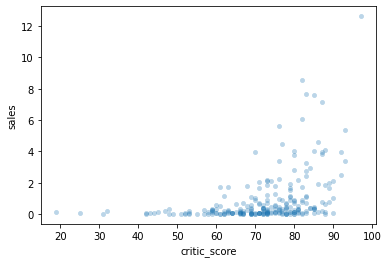

In [38]:
df.query('platform == "ps4" & critic_score != 3000').plot(x='critic_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    
Срез стоит подправить. Имеются строки, где нет оценки пользователей, но есть оценка юзеров. Срезая все сразу, мы теряем эти строки. 
        
        ps4 = ps4[ps4['user_score'] != 3000 ]
        ps4 = ps4[ps4['critic_score'] != 3000]
        
и для остальной части исследования        
</div>

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    
Срез стоит подправить. Имеются строки, где нет оценки пользователей, но есть оценка юзеров. Срезая все сразу, мы теряем эти строки. 
        
        ps4=ps4.query('((user_score != 3000) & (critic_score != 3000))&(user_score != 3000)&(critic_score != 3000) ') 
        
Объединение и задвоение условий фильтрации
        
        ((user_score != 3000) & (critic_score != 3000))&(user_score != 3000)&(critic_score != 3000)
        
все также удаляет все записи без оценок, даже те, где имеются оценки или от игроков, или от критиков     
        
        Имеются строки, где нет оценки пользователей, но есть оценка юзеров. Срезая все сразу, мы теряем эти строки. 
        
а нам стоит сохранить записи в которых, например, имеется оценка критиков, но не имеется оценки игроков, и наоборот
        
и исправить подобный код в остальной части исследования        
</div>

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> на проектах стоит снижать размерность выводимой информации, где не требуется максимальная точность, до одного или двух знаков после запятой
        
            -0.031957110204556376

In [39]:
df.query('platform == "ps4" & user_score != 3000')[['sales','user_score']].corr()

,sales,user_score
sales,1.000000,-0.040132
user_score,-0.040132,1.000000


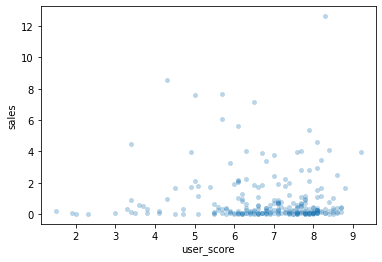

In [40]:
df.query('platform == "ps4" & user_score != 3000').plot(x='user_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

Судя по поэффициенту корреляции Пирсона  в данной платформе имеется слабо выраженное влияние критиков, нет влияния пользователей. Но в среднем на диаграмме рассеяния видно: чем лучше оценки, тем больше продаж.

Повторим все действия для 3DS.

In [41]:
df.query('platform == "3ds" & critic_score != 3000')[['sales','critic_score']].corr()


,sales,critic_score
sales,1.000000,0.320596
critic_score,0.320596,1.000000


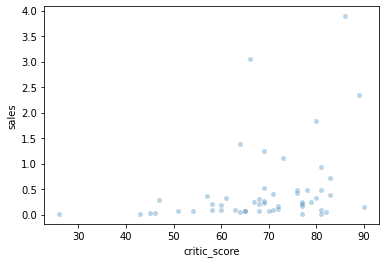

In [42]:
df.query('platform == "3ds" & critic_score != 3000').plot(x='critic_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

In [43]:
df.query('platform == "3ds" & user_score != 3000')[['sales','user_score']].corr()

,sales,user_score
sales,1.000000,0.230161
user_score,0.230161,1.000000


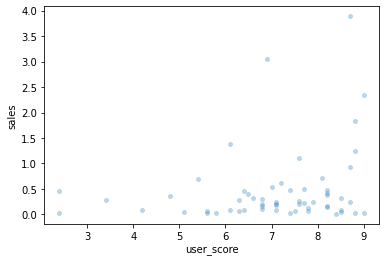

In [44]:
df.query('platform == "3ds" & user_score != 3000').plot(x='user_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

Оценки от игроков оказывают не такое значительное влияние на продажи и в случае с этой платформой.

Возьмем теперь для анализа платформу PS3

In [45]:
df.query('platform == "ps3" & critic_score != 3000')[['sales','critic_score']].corr()

,sales,critic_score
sales,1.000000,0.474398
critic_score,0.474398,1.000000


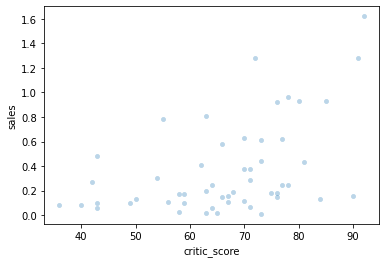

In [46]:
df.query('platform == "ps3" & critic_score != 3000').plot(x='critic_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

In [47]:
df.query('platform == "ps3" & user_score != 3000')[['sales','user_score']].corr()

,sales,user_score
sales,1.000000,-0.142199
user_score,-0.142199,1.000000


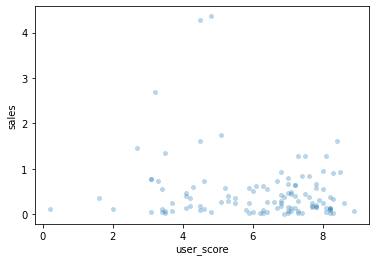

In [48]:
df.query('platform == "ps3" & user_score != 3000').plot(x='user_score', y='sales', kind='scatter', linewidth= 0.3, alpha = 0.3)
plt.show()

Здесь видим слабо выраженное влияние критиков, нет влияния пользователей.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Сравнение показателей на нескольких платформах, позволяет набрать вес твоему исследованию, молодец

Посмотрим на общее распределение игр по жанрам.

In [49]:
df.groupby('genre')['sales'].median().sort_values(ascending=False)

genre
shooter         0.410
sports          0.200
platform        0.130
fighting        0.125
role-playing    0.110
action          0.100
simulation      0.100
misc            0.090
racing          0.090
puzzle          0.080
strategy        0.060
adventure       0.030
Name: sales, dtype: float64

По медианным значениям наиболее прибыльный жанр игр - shooter, на втором месте sports, на третьем - platform. Самые низкие продажи у strategy, puzzle и adventure.

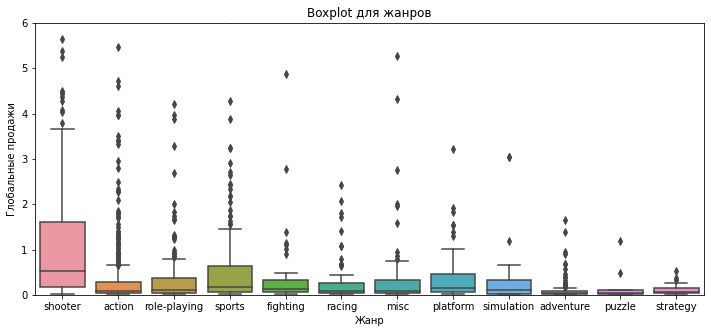

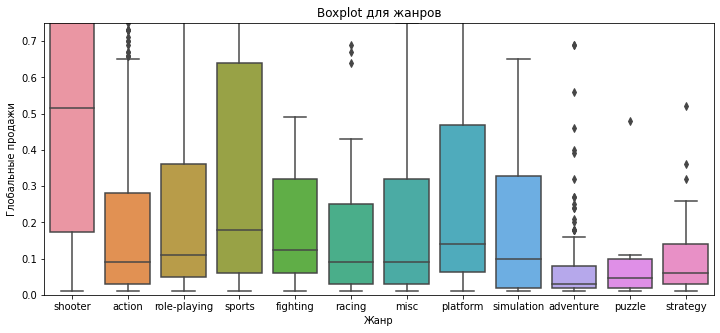

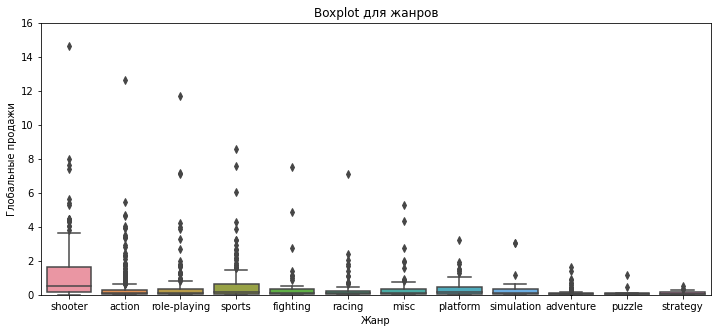

In [50]:
plt.figure(figsize=(12,5))
sns.boxplot(x ='genre', y = 'sales', data=data6);
plt.ylim(0,6)
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.title('Boxplot для жанров')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x ='genre', y = 'sales', data=data6);
plt.ylim(0,0.75)
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.title('Boxplot для жанров')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x ='genre', y = 'sales', data=data6);
plt.ylim(0,16)
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.title('Boxplot для жанров')
plt.show()

Сравнивая глобальные продажи по жанрам за актуальный период на диаграмме размаха, первое что посмотрим это минимальные и максимальные значения. Есть выбросы свыше 15млн., это жанр shooter. Так же выбросы имеют жанры action и role-playing. Это может означать, что в жанре есть небольшое количество игр-звезд, тянущих за собой средние продажи, но в основном продажи не очень высокие. А в жанре sports, наоборот, меньше провалов, но и нет звезд. Но объетивнее рассматривать межквартальный размах. Наилучшие показатели shooter 3,7 млн., на втором месте sports 1,7млн., на третьем - platform 1,5млн. Самые низкие продажи у strategy, puzzle и adventure. При этом если смотреть на медианные продажи, то тройка лидеров: platform, sports, shooter. 

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит добавить третий вид, диаграмму размаха со 100% масштабом

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)
       

В ходе исследовательского анализа данных были проанализированы данные за весь период, за период с 2014 по 2016 годы, отдельно для платформ. Количество выпускаемых игр с годами значительно возросло. Наибольшие суммарные продажи за весь период имеют PS2, PS3, X360, DS и Wii. Средний "срок жизни" платформы - 7-10 лет. Для дальнейшего анализа был выделен отдельный датафрейм с данными с 2014 по 2016 год для создания прогноза на 2017 год. В релевантной выборке самой популярной игровой платформой была ps4 (288.15), на втором месте xone (140.36), третье место у  3ds (87.87). ННаилучшие показатели у ps4 - на уровне 1,55 млн., дальше идет хоne фактически лидер последних (до 2016 года) лет -1,5 млн., далее идет wiiu - 1,4 млн, х360 - 1,2 млн. и wii - 1млн. Но х360 и wii уже исполнилось 10 лет и они с малой вероятностью станут перспективными в 2017 году, пожтому из этой выборки оставляем ps4, хоne и wiiu . На эти платформы маркетологам стоит делать акцент. За счет того, что сфера компьютерных игр очень динамично развивается, необходимо отслеживать изменения оперативно, чтобы выявить самый потенциально прибыльный продукт на рынке. Согласно диаграммаv рассеяния и коэффициенту корреляции Пирсона, оценки от игроков не оказывают большого влияния на продажи игры, но в целом видна зависимость между более высокими продажами игры и более высокими оценками от игроков. В то время как оценки от критиков оказывают значительное влияние на продажи: чем лучше оценки критиков, тем выше продажи игры. По медианным значениям наиболее прибыльный жанр игр - shooter, на втором месте sports, на третьем - platform. Самые низкие продажи у strategy, puzzle и adventure.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Промежуточные выводы отлично помогают составить итоговый и не упустить детали на проекте, молодец
        
стоит поправить нюансы

## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
-  Самые популярные платформы (топ-5). 
-  Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Построим отдельные таблицы и графики для каждого региона

In [51]:
data7=df.query('year_of_release!=3000')

/tmp/ipykernel_523/1588357190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_na_sales_5.loc['Other', 'na_sales']=platform_na_sales.iloc[5:].sum()[0]


,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
Other,31.19


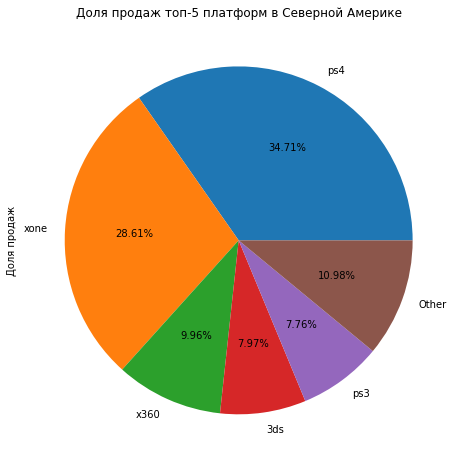

In [52]:
# сделаем сводную таблицу общих продаж в Северной Америке по платформам.  
platform_na_sales=data7.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

# в переменной top_na_sales_5 будут топ-5 платформ
top_na_sales_5=platform_na_sales.head()

top_na_sales_5 
# добавим в топ-5 по платформам сумму с 6 строки до конечной и запишем эту сумму как 'Other' 

top_na_sales_5.loc['Other', 'na_sales']=platform_na_sales.iloc[5:].sum()[0]

display(top_na_sales_5)

# построим круговую диаграмму, где отразим доли продаж по платформам
top_na_sales_5.plot(kind='pie', y='na_sales', figsize=(8,8), legend=False, autopct='%.2f%%')

plt.title('Доля продаж топ-5 платформ в Северной Америке')
plt.ylabel('Доля продаж')

plt.show()

Cамые популярные платформы в Северной Америке- ps4, xone и  X360.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заполнение пропусков маркером = 3000, сыграло шутку с данными и исказило наши цифры и долю рынка ...
        
В выборку         
        
        platform_na_sales
        
попали устаревшие платформы, которые не продавались после 2014 года ..., по этой  причине мы исказили реальную долю рынка, которую занимают современные платформы

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

In [53]:
# check
platform_na_sales

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
wiiu,19.36
pc,7.23
psv,2.52
wii,2.08


/tmp/ipykernel_523/4211135928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_eu_sales_5.loc['Other', 'eu_sales']=platform_eu_sales.iloc[5:].sum()[0]


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12
Other,34.76


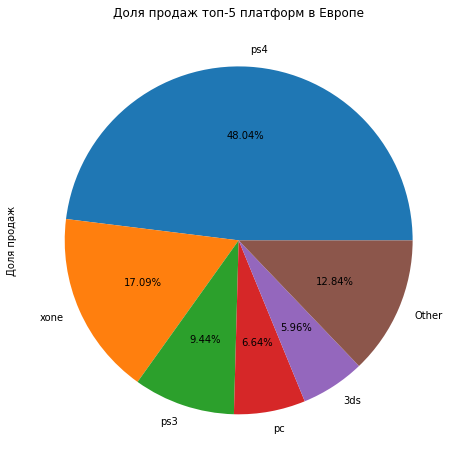

In [54]:
# сделаем сводную таблицу общих продаж в Северной Америке по платформам.  
platform_eu_sales=data7.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

# в переменной top_eu_sales_5 будут топ-5 платформ
top_eu_sales_5=platform_eu_sales.head()

top_eu_sales_5 
# добавим в топ-5 по платформам сумму с 6 строки до конечной и запишем эту сумму как 'Other' 

top_eu_sales_5.loc['Other', 'eu_sales']=platform_eu_sales.iloc[5:].sum()[0]

display(top_eu_sales_5)

# построим круговую диаграмму, где отразим доли продаж по платформам
top_eu_sales_5.plot(kind='pie', y='eu_sales', figsize=(8,8), legend=False, autopct='%.2f%%')

plt.title('Доля продаж топ-5 платформ в Европе')
plt.ylabel('Доля продаж')
plt.show()

Cамые популярные платформы в Европе - ps4, xone и  ps3.

/tmp/ipykernel_523/2553849087.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_jp_sales_5.loc['Other', 'jp_sales']=platform_jp_sales.iloc[5:].sum()[0]


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
Other,0.76


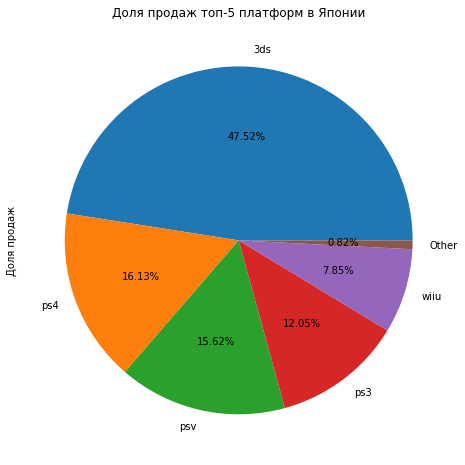

In [55]:
# сделаем сводную таблицу общих продаж в Северной Америке по платформам.  
platform_jp_sales=data7.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

# в переменной top_eu_sales_5 будут топ-5 платформ
top_jp_sales_5=platform_jp_sales.head()

top_jp_sales_5 
# добавим в топ-5 по платформам сумму с 6 строки до конечной и запишем эту сумму как 'Other' 

top_jp_sales_5.loc['Other', 'jp_sales']=platform_jp_sales.iloc[5:].sum()[0]

display(top_jp_sales_5)

# построим круговую диаграмму, где отразим доли продаж по платформам
top_jp_sales_5.plot(kind='pie', y='jp_sales', figsize=(8,8), legend=False, autopct='%.2f%%')

plt.title('Доля продаж топ-5 платформ в Японии')
plt.ylabel('Доля продаж')

plt.show()

Пять самых популярных платформ на японском рынке - 3ds, ps4, psv, ps3 и wiiu.

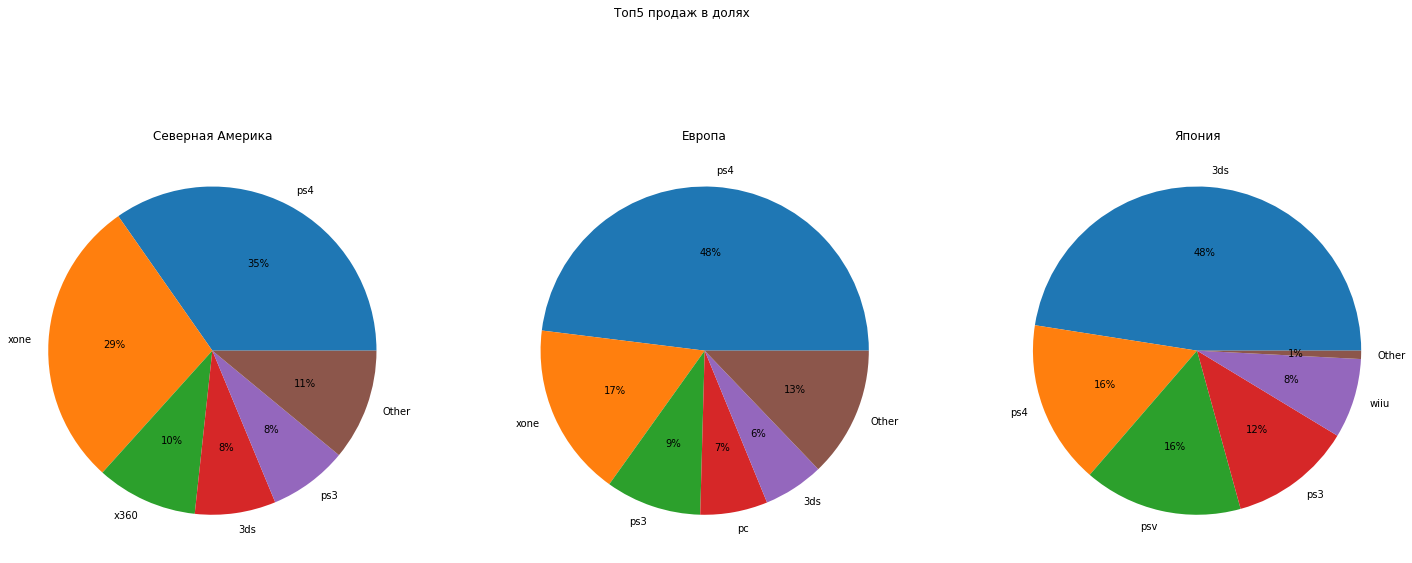

In [56]:
platform_na=data7.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

platform_eu=data7.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

platform_jp=data7.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,10))
fig.suptitle('Топ5 продаж в долях')

ax1.pie(top_na_sales_5['na_sales'], labels=top_na_sales_5.index, autopct='%.0f%%')
ax1.set_title('Северная Америка')

ax2.pie(top_eu_sales_5['eu_sales'], labels=top_eu_sales_5.index, autopct='%.0f%%')
ax2.set_title('Европа')

ax3.pie(top_jp_sales_5['jp_sales'], labels=top_jp_sales_5.index, autopct='%.0f%%')
ax3.set_title('Япония')

plt.show()

В Северной Америке и в Европе ps4 занимает лидирующую позицию, 34% и 48% соответственно. А в Японии почти половину продаж 47% занимает платформа 3ds.  
Xone занимает второе место в Северной Америке(28%) и Европе (17%). Японские игроманы снова отличились, они предпочитают ps4 (16%). Третье место принадлежит в Северной Америке х360 (9%),  в Европе ps3 (9%) и в Японии psv (15%)

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, у тебя получилось решить задачу с сабплотом, молодец. Осталось поправить сами выборки
        
        Для уменьшения разрыва между первым заголовком и графиками стоит уменьшить высоту самого графика
        
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,10))

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов нарисованы, молодец, значительное влияние на портрет оказывает период с 1980 г. ..., можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ выбрать актуальный период;
+ для каждого ТОП-5 - построить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
 

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
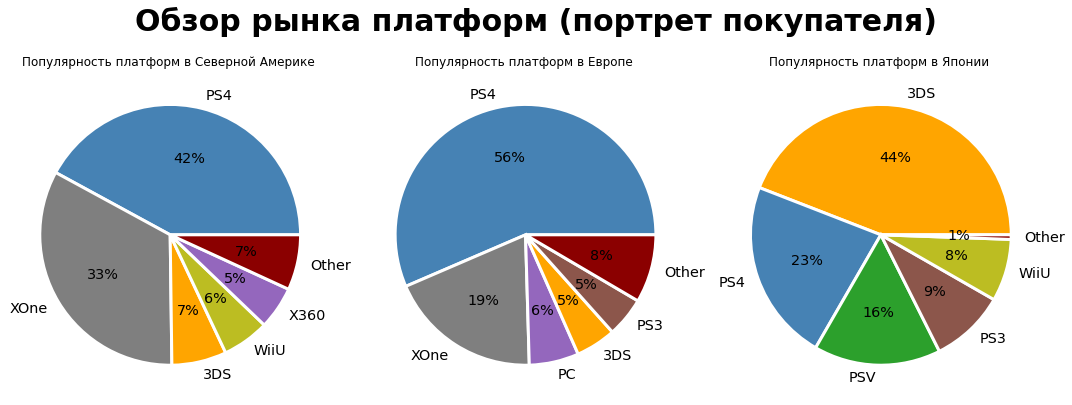        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит поправить все выборки в разделе ТОП-5

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличная работа, молодец

Посмотрим теперь на самые 5 популярных жанров.

In [57]:
#топ-5 жанров в Северной Америке
data_genre_na = data7.pivot_table(
    index='genre',
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False).head()
data_genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


In [58]:
data_genre_na_all = data7.pivot_table(
    index='genre',
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False)

In [59]:
data_genre_na.loc['Other', 'na_sales'] = data_genre_na_all.iloc[5:].sum()[0]

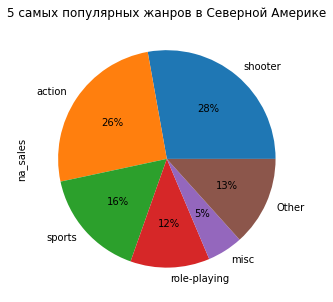

In [60]:
data_genre_na.plot(kind='pie', y='na_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
plt.title('5 самых популярных жанров в Северной Америке')
plt.show()

В Северной Америке самый популярный жанр игр - shooter, он занимает 28%, на втором месте - action с 26%, на третьем - sports - 16%.

In [61]:
#топ-5 жанров в Европе
data_genre_europe = data7.pivot_table(
    index='genre',
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False).head()
data_genre_europe

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


In [62]:
data_genre_europe_all = data7.pivot_table(
    index='genre',
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False)

In [63]:
data_genre_europe.loc['Other', 'eu_sales'] = data_genre_europe_all.iloc[5:].sum()[0]

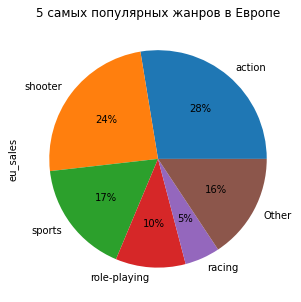

In [64]:
data_genre_europe.plot(kind='pie', y='eu_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
plt.title('5 самых популярных жанров в Европе')
plt.show()

В Европе популярнее всего жанр action - 28%, shooter имеет 24%, sports - 17%.

In [65]:
#топ-5 жанров в Японии
data_genre_japan = data7.pivot_table(
    index='genre',
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False).head()
data_genre_japan

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


In [66]:
data_genre_japan_all = data7.pivot_table(
    index='genre',
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False)

In [67]:
data_genre_japan.loc['Other', 'jp_sales'] = data_genre_japan_all.iloc[5:].sum()[0]

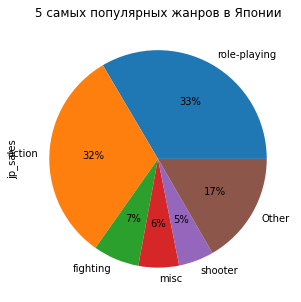

In [68]:
data_genre_japan.plot(kind='pie', y='jp_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
plt.title('5 самых популярных жанров в Японии')
plt.show()

На японском рынке популярнее всего жанр role-playing - 33%, на втором месте action - 32%, на третьем fighting - 7%.

Посмотрим теперь влияет ли рейтинг ESRB на продажи.

In [69]:
#Северная Америка
data_north_america_esrb = data7.pivot_table(
    index='rating',
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False)
data_north_america_esrb.head()

,na_sales
rating,
M,96.42
NaN,64.72
E,50.74
T,38.95
E10+,33.23


На рынке Северной Америки игры с рейтингом М имеют больше всего продаж, а игры с рейтингом E10+  имеют самые маленькие продажи в Топ-5.

In [70]:
#Европа
data_europe_esrb = data7.pivot_table(
    index='rating',
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False)
data_europe_esrb.head()

,eu_sales
rating,
M,93.44
NaN,58.95
E,58.06
T,34.07
E10+,26.16


В Европе популярнее всего игры с возрастным рейтингом М. На последнем месте также рейтинг E10+.

In [71]:
#Япония
data_japan_esrb = data7.pivot_table(
    index='rating',
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False)
data_japan_esrb.head()

,jp_sales
rating,
NaN,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


В Японии больше всего покупают игры, не получившие рейтинг ESRB, на втором месте игры рейтинга T, а игры E10+ плохо продаются.

Так, наблюдается явная взаимосвязь между Европой и Северной Америкой: здесь популярностью пользуются игры с рейтингом М. E10+ замыкает топ-5 как в Европе, так и Северной Америке. Также логично, что в Японии популярнее всего игры без ESRB рейтинга: в Японии возрастными рейтингами занимается CERO, некоммерческая организация. Японский рынок во многом обособлен, и часть игр были созданы для японского рынка и не подавались на европейский рейтинг ESRB.


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Интересно в чем причина, что на рынке Японии продается так много игр без рейтинга ESRB

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />принимается

## Шаг 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;



H0: Средние пользовательские рейтинги платформы Xbox One и PC равны.

Н1: Средние пользовательские рейтинги платформы Xbox One и PC не равны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем t-тест: scipy.stats.ttest_ind(array1, array2, egual_var). Уровень статитсической значимости возьмем 0.05

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Гипотезы сформулированы верно

In [72]:
df1=df.query('user_score!=3000')

In [73]:
xone_score=df1[df1['platform'] == 'xone']['user_score']
pc_score=df1[df1['platform'] == 'pc']['user_score']

alpha = 0.05

results = st.ttest_ind(xone_score, pc_score, equal_var=False)
print(f'Выборочное среднее пользоваельских рейтингов для платфомы "XOne": {xone_score.mean()}')
print(f'Выборочное среднее пользоваельских рейтингов для платфомы "PC": {pc_score.mean()}')
print('р-значение:', results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Выборочное среднее пользоваельских рейтингов для платфомы "XOne": 6.594545454545456
Выборочное среднее пользоваельских рейтингов для платфомы "PC": 6.362773722627738
р-значение: 0.1967056824534949
Не получилось отвергнуть нулевую гипотезу


Таким образом, мы  принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Средние пользовательские рейтинги платформы Xbox One и PC равны.

In [74]:
xone_score, pc_score

(165      7.9
 179      5.4
 242      6.4
 270      6.2
 373      4.1
         ... 
 16544    6.8
 16597    6.0
 16630    8.2
 16643    6.6
 16660    6.7
 Name: user_score, Length: 165, dtype: float64,
 458      3.9
 1131     5.2
 1530     5.4
 1730     7.9
 2303     5.7
         ... 
 16456    8.3
 16463    6.8
 16509    7.9
 16518    1.4
 16692    7.6
 Name: user_score, Length: 137, dtype: float64)

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит поправить выборки ⬆⬆⬆

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики р-значение: 0.11601398086668832

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Р-значение это вероятность получения результатов.Полученное значение p-value говорит о том, что нам не удалось отвергнуть нулевую гипотезу, с вероятностью в почти 19% рейтинги Xbox One и PC равны.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Если для людей далеких от статистики то 
        
       вероятность ошибки при отклонении нулевой гипотезы составит 19%
        
если знакомых со статистикой, то 
        
        с вероятностью около 19% различие в средних оценках для исследуемых платформ мы получим случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Значение после доработок поменялось на 0,03. P-value это вероятность получить наблюдаемое на выборке значение или более далёкое от предположенного в Н0. Если наблюдаемое значение (р-значение) оказалось меньше значения статистической значимости, то мы отвергаем нулевую гипотезу. 

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Приведу пример и теорию для понимания формулировок и интерпретации итогов проведения гипотез</b>
        
      
Задача. Приведены два датасета: сумма покупок, совершённых за месяц посетителями, привлечёнными по двум разным каналам. В вашем распоряжении случайная выборка из 30 покупок для каждого канала.
        
H0 - средние чеки равны
        
        
H1 - средние чеки НЕ равны

Да сама формулировка нулевой и альтернативной гипотезы звучит именно так, но результат теста интерпретируется другими словами
        

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
    
P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. <b>Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода)</b> пример ниже

In [75]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action  и Sports равны.

Н1: Средние пользовательские рейтинги жанров Action  и Sports  не равны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем t-тест: scipy.stats.ttest_ind(array1, array2, egual_var). Уровень статитсической значимости возьмем 0.05

In [76]:
action_genre=df1[df1['genre'] == 'action']['user_score']
sports_genre=df1[df1['genre'] == 'sports']['user_score']

alpha = 0.05

results = st.ttest_ind(action_genre, sports_genre, equal_var=False)
print(f'Выборочное среднее пользоваельских рейтингов жанра "Action": {action_genre.mean()}')
print(f'Выборочное среднее пользоваельских рейтингов жанра "Sports": {sports_genre.mean()}')
print('р-значение:', results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Выборочное среднее пользоваельских рейтингов жанра "Action": 6.768580060422961
Выборочное среднее пользоваельских рейтингов жанра "Sports": 5.55234899328859
р-значение: 4.474148069226537e-11
Отвергаем нулевую гипотезу


Анализ показал, что мы должны отвергнуть нулевую гипотезу. Принимает альтернативную о том, что средние пользовательские рейтинги жанров Action и Sports не равны.

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
стоит избавиться от любых видов заглушек (нулевых, отрицательных, положительных) при расчете стат. тестов 
        
        action_genre=data[(data['genre'] == 'action') & (data['user_score']>=0) & (data['year_of_release']>=2014)]['user_score']
        sports_genre=data[(data['genre'] == 'sports') & (data['user_score']>=0) & (data['year_of_release']>=2014)]['user_score']

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента 2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

## Шаг 6. Общий вывод

Проведя исследование мы проанализировали различные компьютерные игры, платформы, попытались дать описание типичному пользователю изразных регионов с целью определения потенциально популярного продукты для проведения успешной рекламной камании на предстоящий год.
Период для анализа был взят 2014-2016гг. 

В ходе исследовательского анализа данных были проанализированы данные за весь период, за период с 2014 по 2016 годы, отдельно для платформ. Количество выпускаемых игр с годами значительно возросло. Наибольшие суммарные продажи за весь период имеют PS2, PS3, X360, DS и Wii. Средний "срок жизни" платформы - 7-10 лет. Для дальнейшего анализа был выделен отдельный датафрейм с данными с 2014 по 2016 год для создания прогноза на 2017 год. В релевантной выборке самой популярной игровой платформой была ps4 (288.15), на втором месте xone (140.36), третье место у  3ds (87.87). Наилучшие показатели у ps4 - на уровне 1,55 млн., дальше идет хоne фактически лидер последних (до 2016 года) лет -1,5 млн., далее идет wiiu - 1,4 млн, х360 - 1,2 млн. и wii - 1млн. Но х360 и wii уже исполнилось 10 лет и они с малой вероятностью станут перспективными в 2017 году, поэтому из этой выборки оставляем ps4, хоne, wiiu, а так же 3ds и pc . На эти платформы маркетологам стоит делать акцент. За счет того, что сфера компьютерных игр очень динамично развивается, необходимо отслеживать изменения оперативно, чтобы выявить самый потенциально прибыльный продукт на рынке. Согласно диаграммаv рассеяния и коэффициенту корреляции Пирсона, оценки от игроков не оказывают большого влияния на продажи игры, но в целом видна зависимость между более высокими продажами игры и более высокими оценками от игроков. В то время как оценки от критиков оказывают значительное влияние на продажи: чем лучше оценки критиков, тем выше продажи игры. По медианным значениям наиболее прибыльный жанр игр - shooter, на втором месте sports, на третьем - platform. Самые низкие продажи у strategy, puzzle и adventure.

После мы составили потреты пользователей по регионам. В Северной Америке и в Европе ps4 занимает лидирующую позицию, 34% и 48% соответственно. А в Японии почти половину продаж 47% занимает платформа 3ds.  Xone занимает второе место в Северной Америке(28%) и Европе (17%). Японские игроманы снова отличились, они предпочитают ps4 (16%). Третье место принадлежит в Северной Америке х360 (9%),  в Европе ps3 (9%) и в Японии psv (15%)

И составили рейтинг по жанрам. На японском рынке популярнее всего жанр role-playing - 33%, на втором месте action - 32%, на третьем fighting - 7%. В Европе популярнее всего жанр action - 28%, shooter имеет 24%, sports - 17%.В Северной Америке самый популярный жанр игр - shooter, он занимает 28%, на втором месте - action с 26%, на третьем - sports - 16%.

Наблюдается явная взаимосвязь между Европой и Северной Америкой: здесь популярностью пользуются игры с рейтингом М. E10+ замыкает топ-5 как в Европе, так и Северной Америке. Также логично, что в Японии популярнее всего игры без ESRB рейтинга: в Японии возрастными рейтингами занимается CERO, некоммерческая организация. Японский рынок во многом обособлен, и часть игр были созданы для японского рынка и не подавались на европейский рейтинг ESRB.

Проверили гипотезы и оказалось, что средние пользовательские рейтинги жанров Action и Sports не равны. И средние пользовательские рейтинги платформы Xbox One и PC равны.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после определения актуального периода и исправления всех комментариев, можно обновить названия самых актуальных платформ, жанров и рейтингов, какую долю они занимают на исследуемых рынках
        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        Стоит перепроверить после всех исправлений

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнила практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + добавить название
 + сократить категории в рейтингах ESRB — на твое усмотрение
 + выполнить проверку на дублирование записей
 + самое важное — переопределить актуальный период
 + определить перечень перспективных платформ
 + оценить прибыльность жанров на диаграмме размаха
 + перестроить графики в ТОП-5
 + в разделе проверки гипотез можно более подробно расшифровать значение p_value 
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)      

## Бонус

In [77]:
data_games = pd.read_csv('/datasets/games.csv')

In [78]:
data_games.columns = map(str.lower, data_games.columns)

In [79]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [80]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [81]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [82]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [83]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

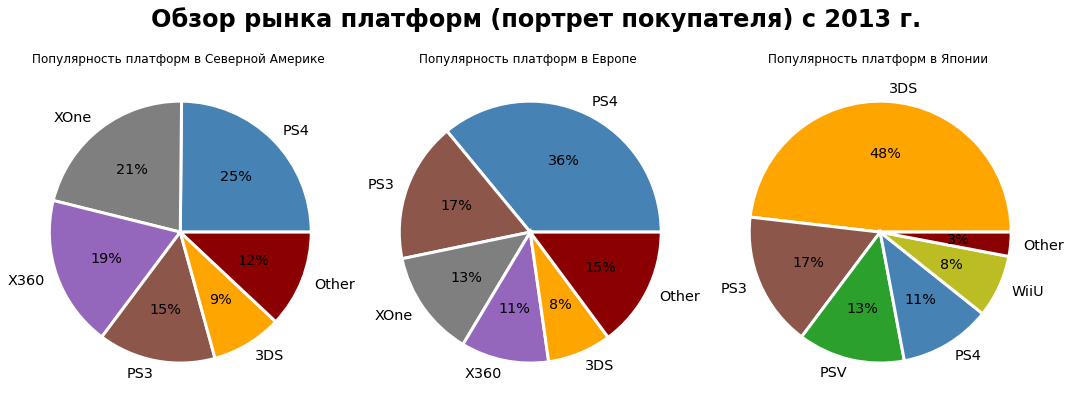

In [84]:
# check
# круги в ряд

x_year = 2013

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

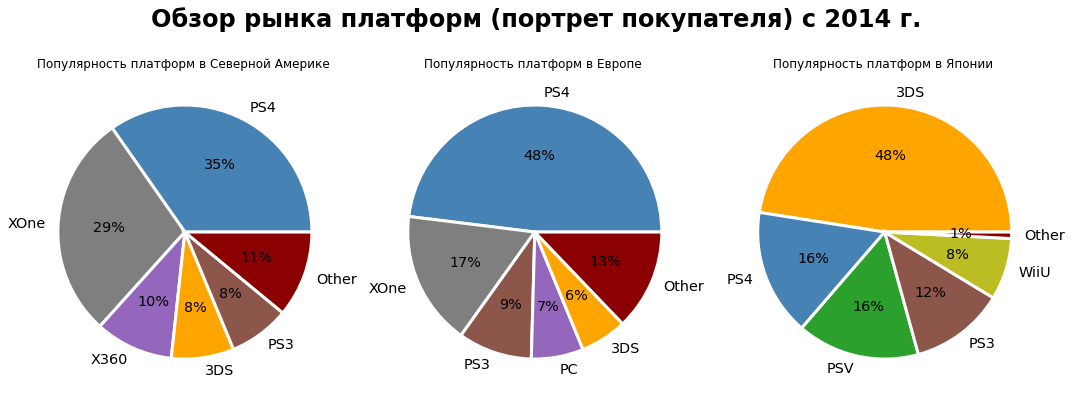

In [85]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

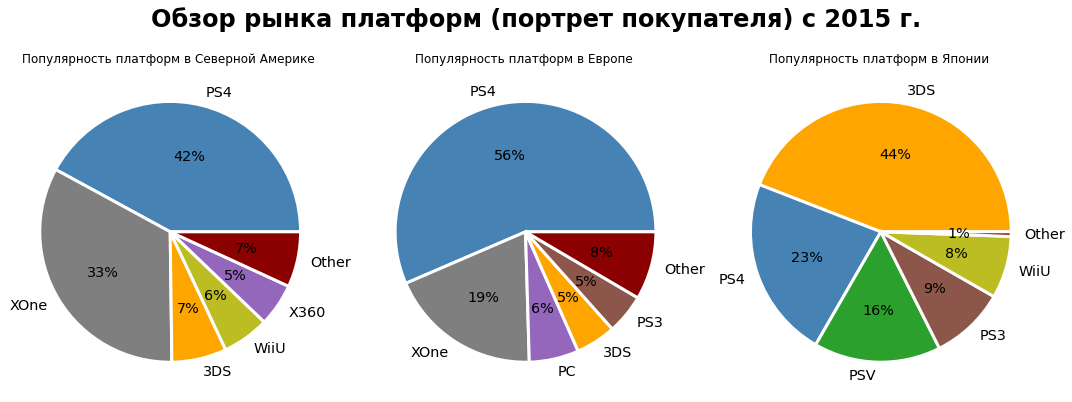

In [86]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])